## House Price Prediction

### Problem statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

### Steps of analysis

#### Data Understanding, Preparation and EDA
#### Data Visualisation
#### Modle Building
#### Rescaling the features
    i.  Lasso Regression
    ii. Ridge Regression
#### Automatic Feature selection using RFE
#### Conclusion

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# avoiding the warnings
import warnings
warnings.filterwarnings("ignore")

#### Loading the Dataset

In [3]:
df = pd.read_csv('train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

#### Inspecting the Dataset

In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe([0.25,0.50,0.75,0.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
99%     505.460000   285.820000     261.050000   168.000000   268.050000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
99%       0.000000    700.000000    12.000000  2010.000000  442567.010000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[9 rows x 38 columns]

In [7]:
# Chekcing the percentage of Null values in all the columns
print('Percentage of Missing Values in each column is as follows:')
print(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)[ round(df.isnull().sum()/len(df.index),2) > 0 ] )

Percentage of Missing Values in each column is as follows:
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
MasVnrType      59.73
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
dtype: float64


#### Exploratory Data Analysis

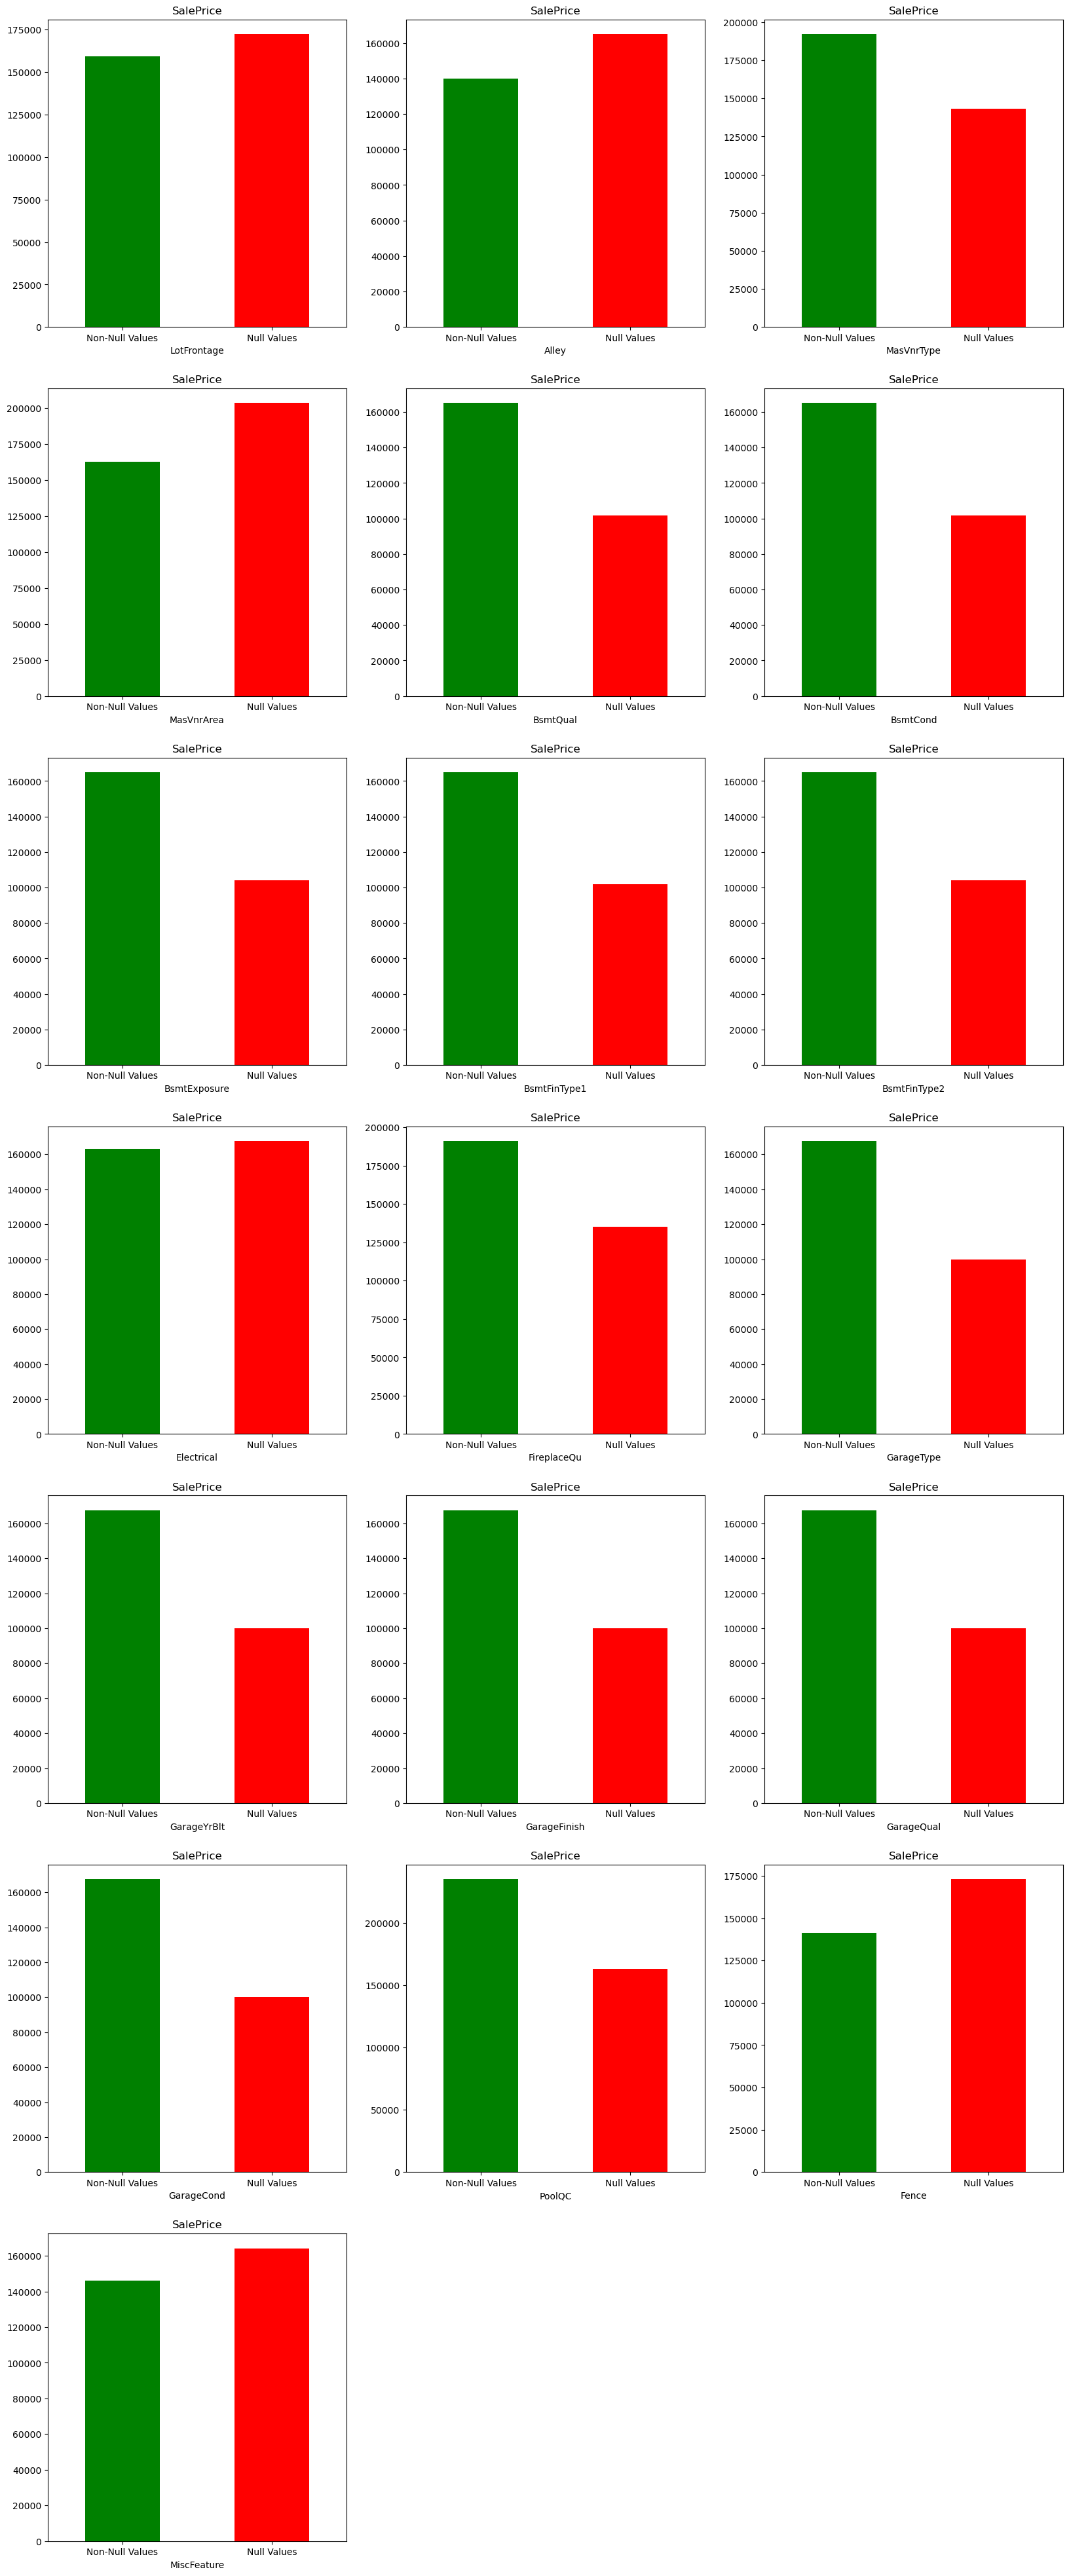

In [8]:
# Checking if NaN Values have any impact on the Sale Price or not
nan_col = []
for i in df.columns:
    if df[i].isnull().sum() > 0:
        nan_col.append(i)
df_copy = df.copy()    
fig,axs= plt.subplots(7,3,figsize=(20,50),squeeze=True)
for i,ax in zip(nan_col,axs.flatten()):    
    df_copy[i] = np.where(df_copy[i].isnull(), 'Null Values', 'Non-Null Values') 
    df_copy.groupby(i)['SalePrice'].median().plot.bar(color = list('gr'),rot=0,ax=ax,subplots=True)
axs[6,1].set_axis_off()    
axs[6,2].set_axis_off() 
plt.show()

In [9]:
# Checking the number of numerical features and the number of categorical features
num_col = []
cat_col = []
for i in df.columns:
    if df[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)
print('There are', len(num_col) ,'numerical features in the dataset')
print('There are', len(cat_col), 'categorical features in the dataset')

There are 38 numerical features in the dataset
There are 43 categorical features in the dataset


Text(0.5, 1.0, 'House Price vs YearSold')

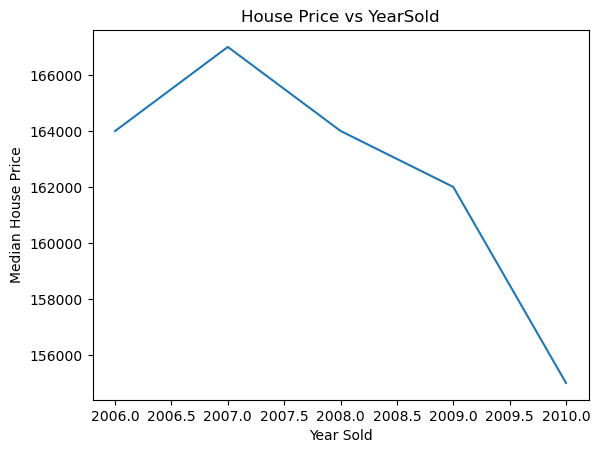

In [10]:
# Chekcing if the median price changes with the year sold
df['YrSold'] = df['YrSold'].astype('int')
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

from this it is clear that after 2007 there is a price drop

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

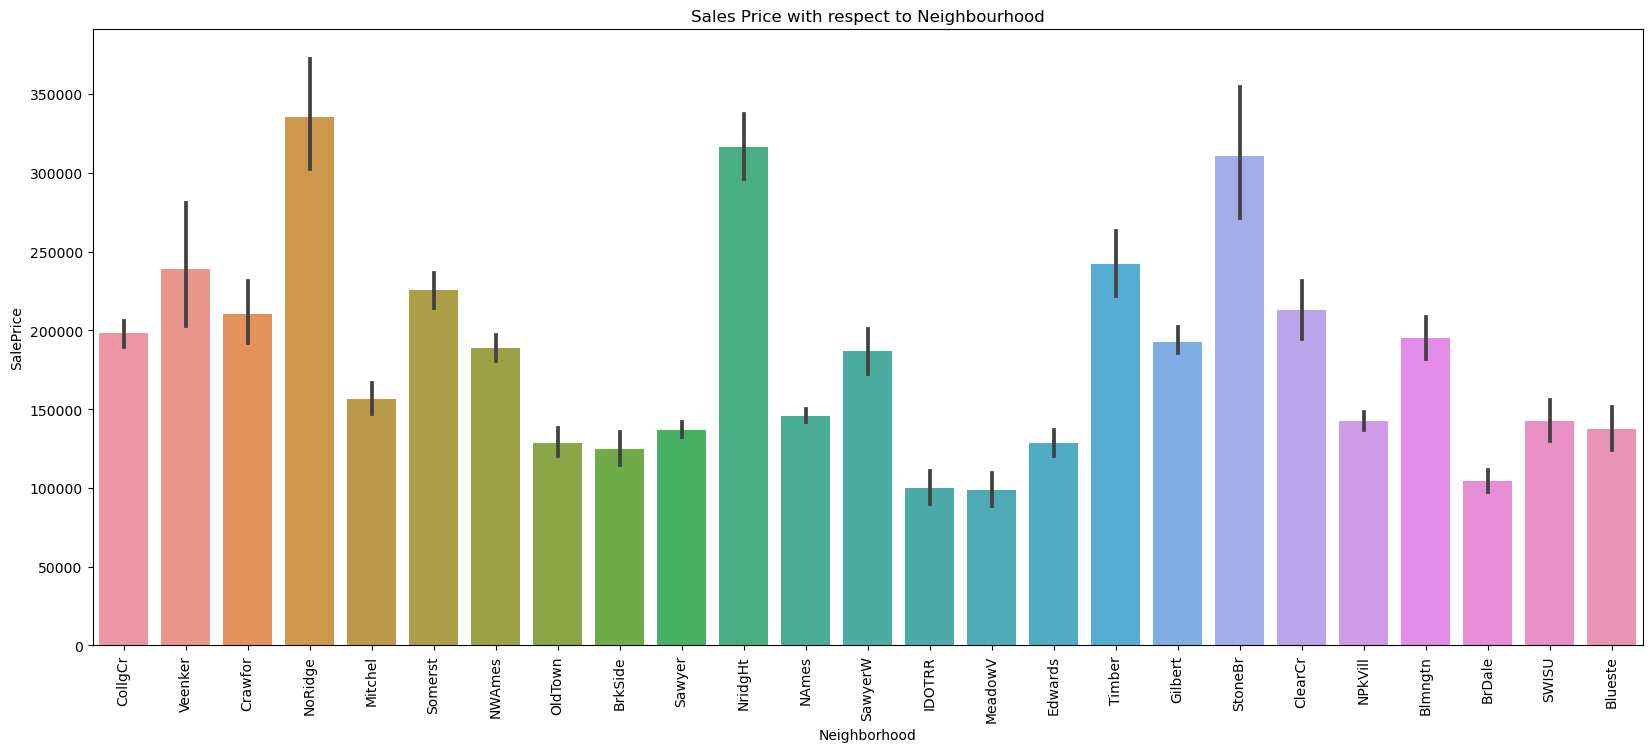

In [11]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= df)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

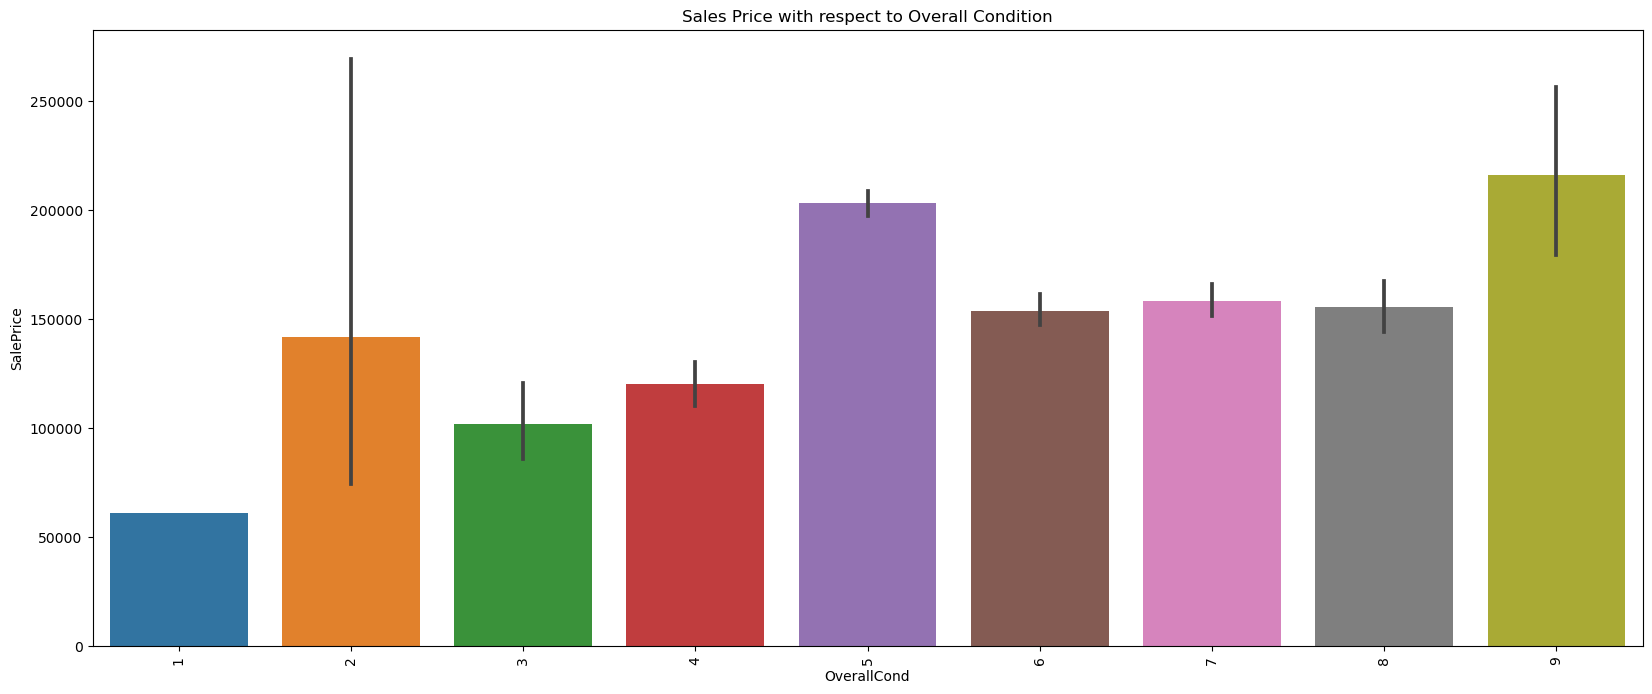

In [12]:
# plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= df)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

In [13]:
# Extracting the Year Features from the Dataset and then checking how the price varies with respect to the age of the estate
yr_cols = []
for i in df.columns:
    if 'Yr' in i or 'Year' in i or 'year' in i or 'yr' in i:
        yr_cols.append(i)
print('List of features with Year are:')
print(yr_cols)

List of features with Year are:
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


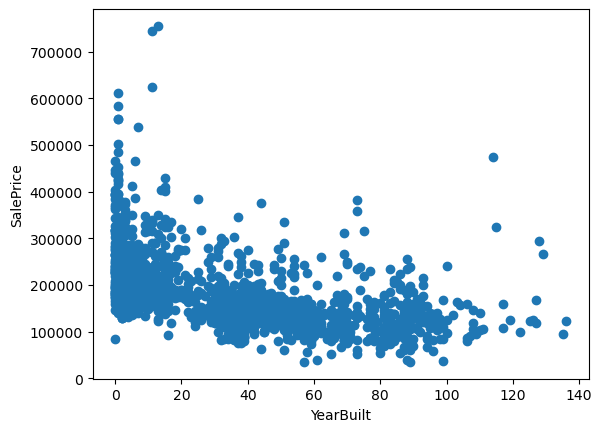

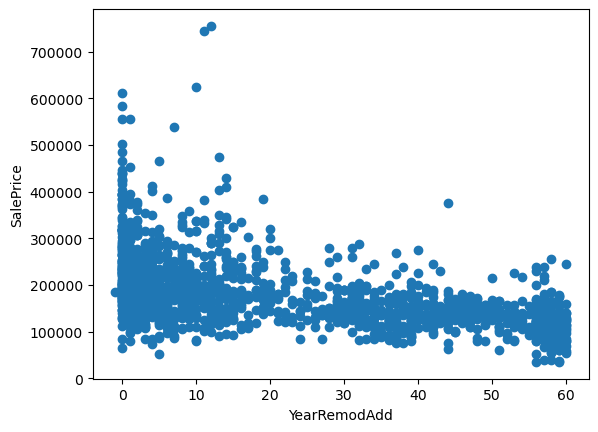

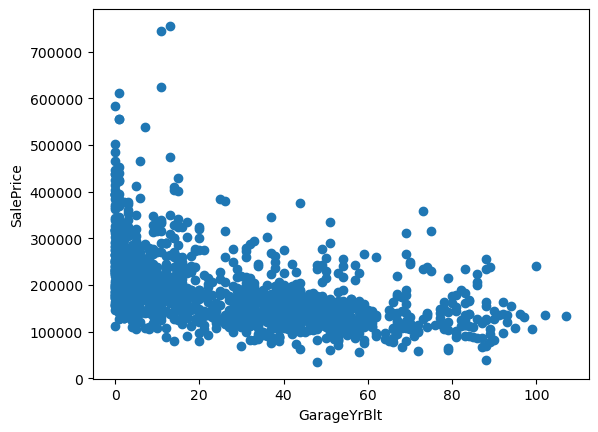

In [14]:
# Comparing the Age of the Building / Renovated Building / Garage with the Sold Price
for feature in yr_cols:
    if feature!='YrSold':
        data=df.copy()
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

It looks like that the new properties are more expensive.

In [15]:
# Dropping ID Columns from dataset since it is useless in the prediction usecase
df.drop('Id', axis=1, inplace=True)

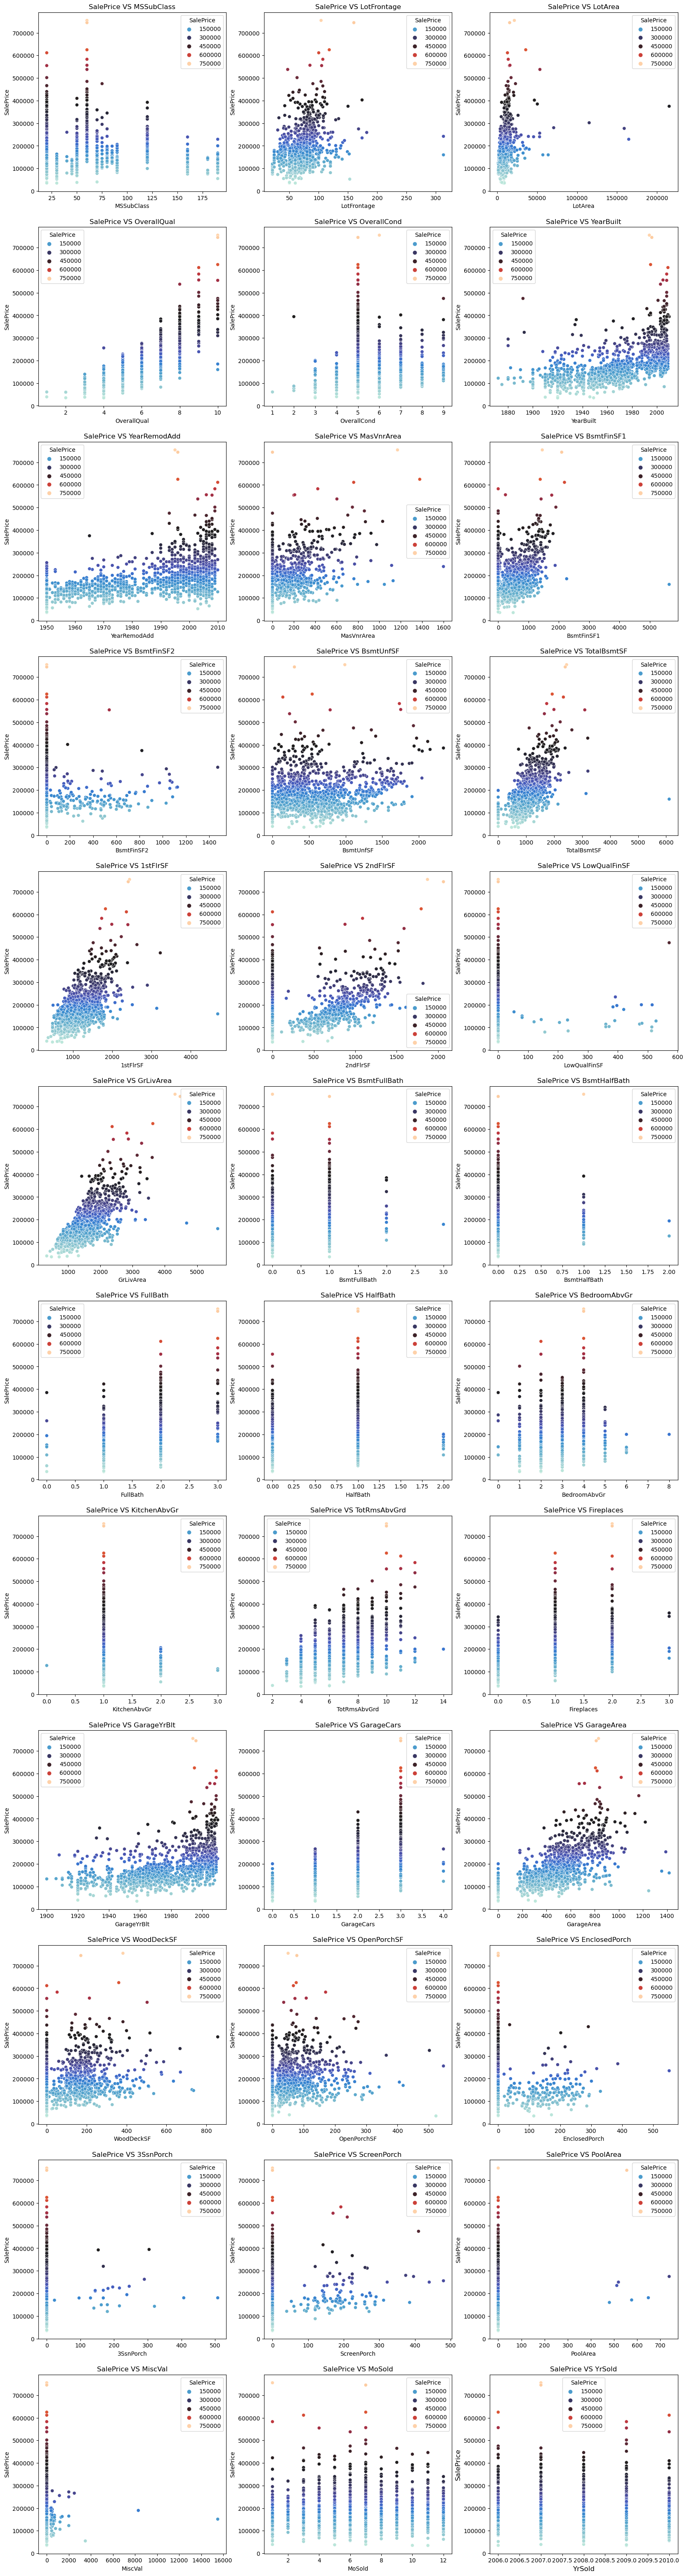

In [16]:
#Visualising numerical predictor variables with Target Variables
df_num = df.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(df_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=df_num,ax=ax,palette='icefire')
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

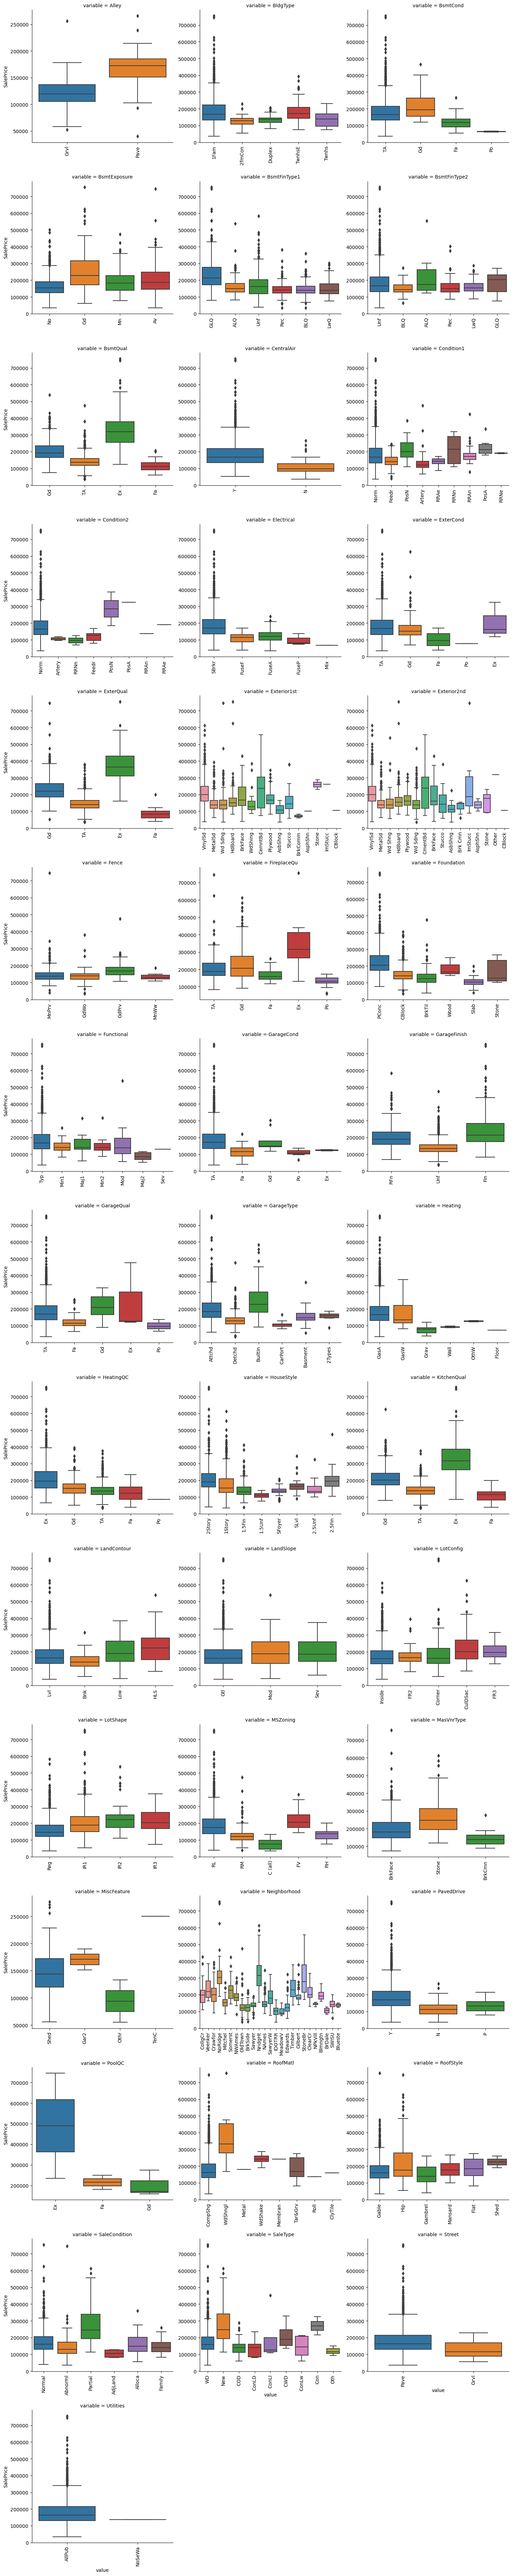

In [17]:
# Plotting Categorical Features with Sale Price
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

categorical = df.select_dtypes(exclude=['int64','float64'])
f = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(df[categorical.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

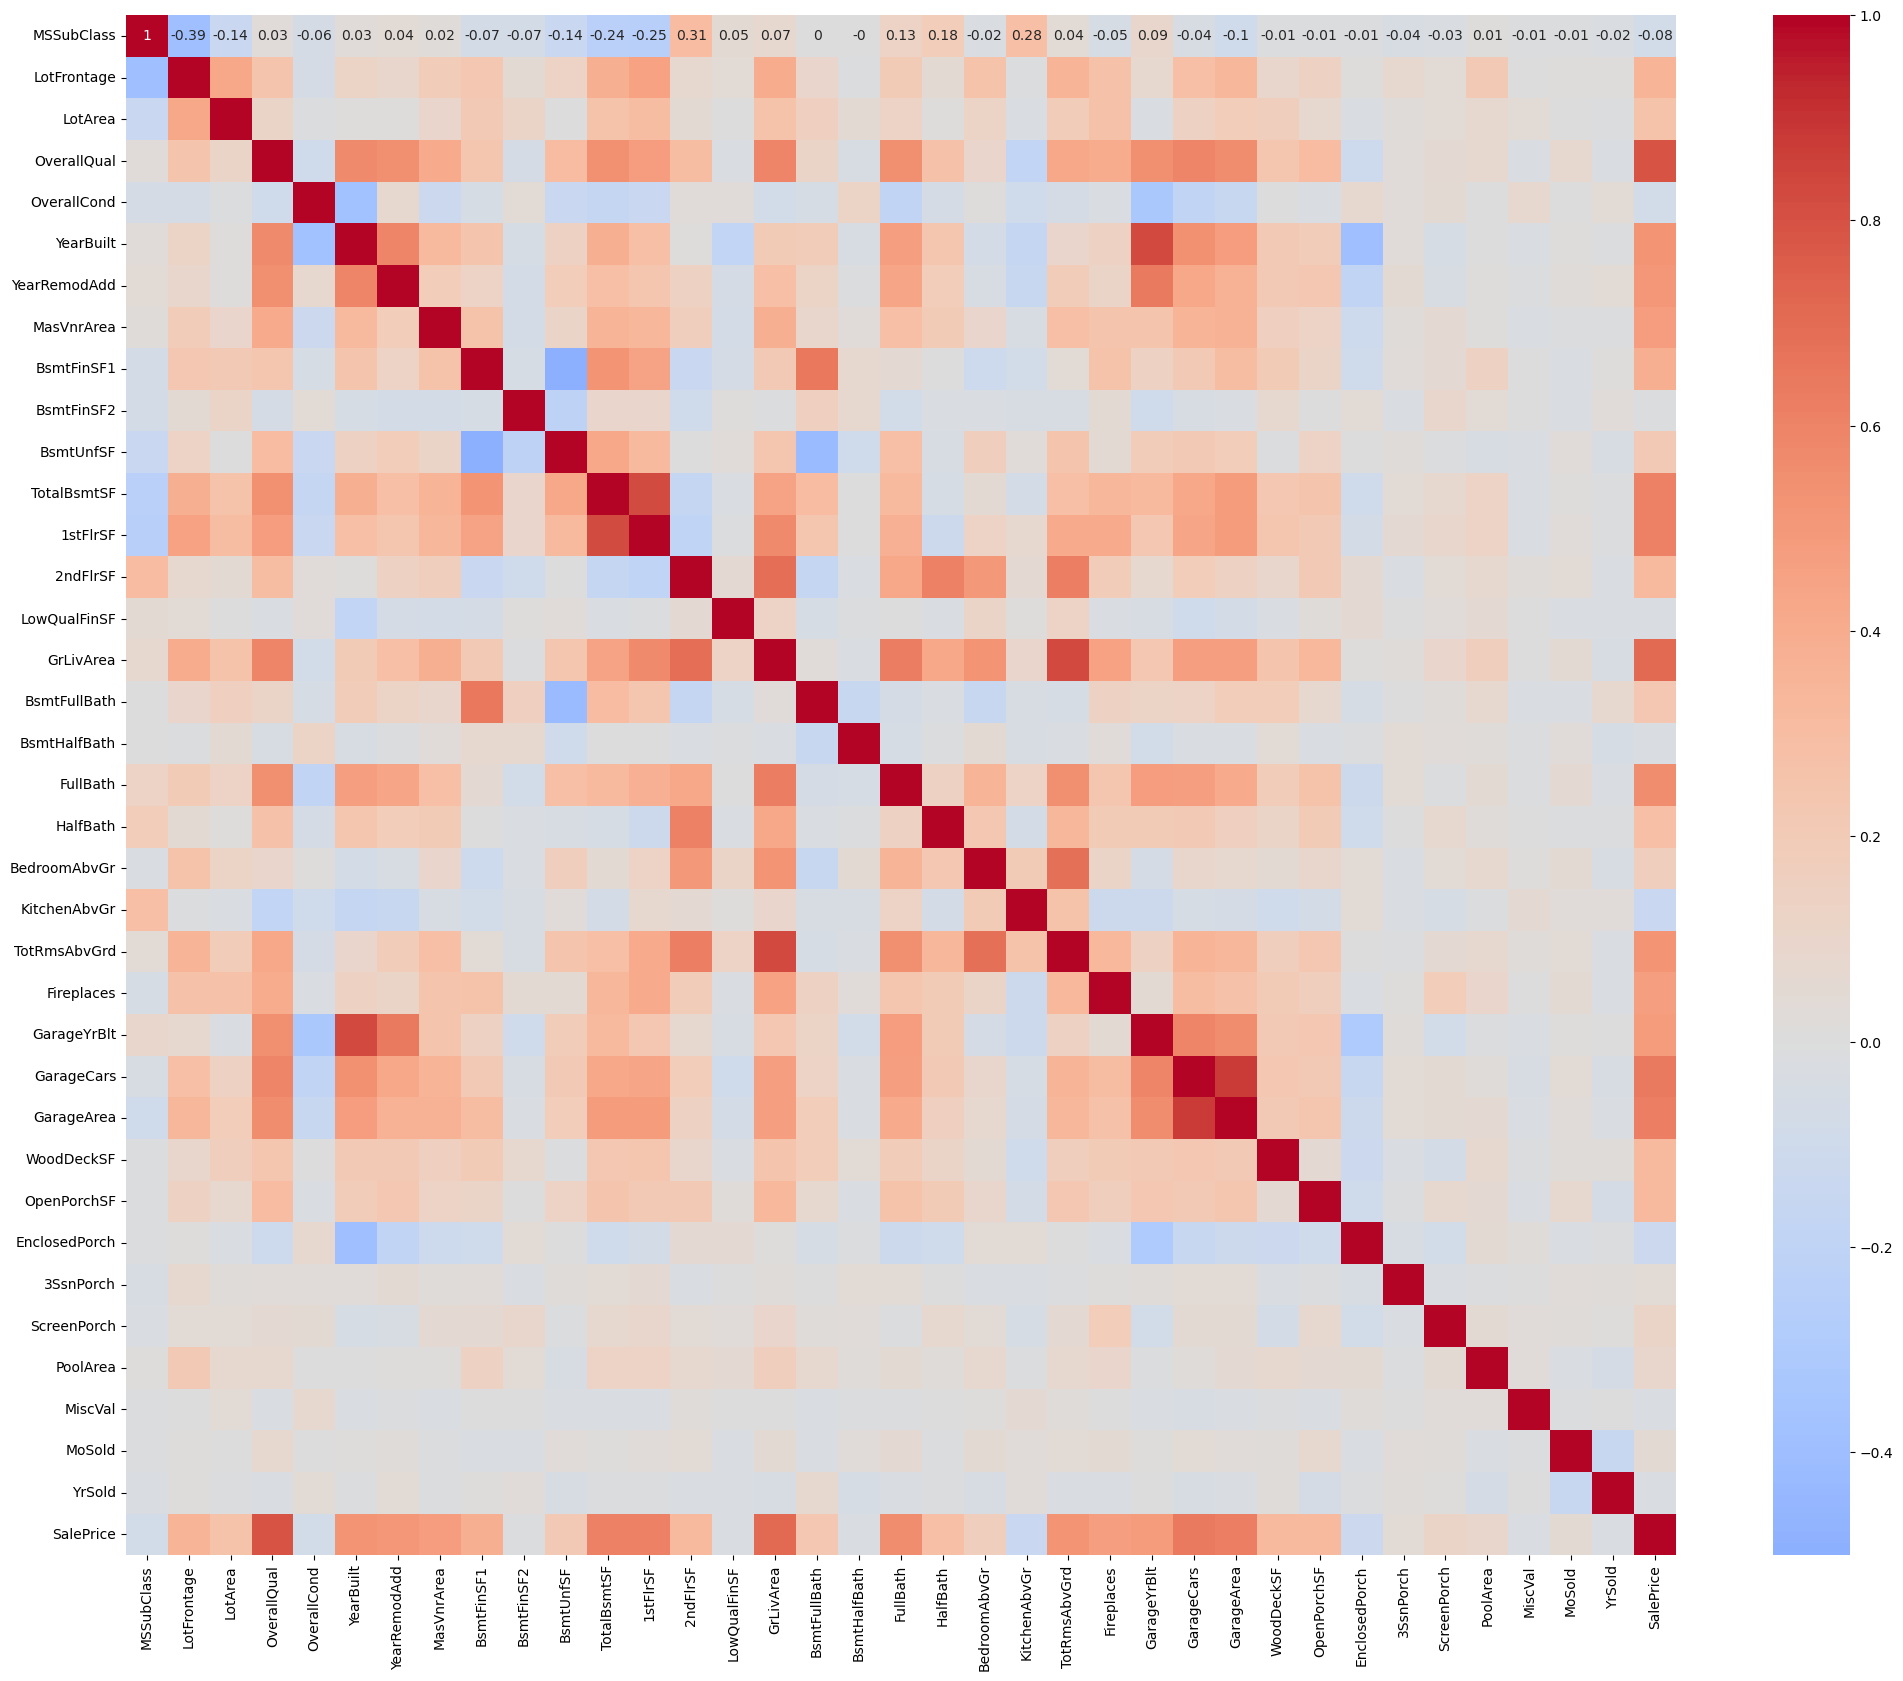

In [18]:
# Checking the corelation
plt.subplots(figsize = (25,20))
#Plotting heatmap of numerical features
sns.heatmap(round(df_num.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

#### Data Preparation

In [19]:
# Creating a new Column to determine the age of the property
df['age']=df['YrSold']-df['YearBuilt']
df['garage_age'] = df['YrSold'] - df['GarageYrBlt']
df['remodel_age'] = df['YrSold'] - df['YearRemodAdd']

df.drop('GarageYrBlt',axis=1,inplace=True)

In [20]:
# We need to convert some Numerical Column to String columns since they are categorical variables. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [21]:
# Converting the Year to String since they are categorical features and should not be treated as numerical features
df[['MSSubClass']] = df[['MSSubClass']].astype(str) 
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0         60       RL         65.0     8450   Pave   NaN      Reg         Lvl   
1         20       RL         80.0     9600   Pave   NaN      Reg         Lvl   
2         60       RL         68.0    11250   Pave   NaN      IR1         Lvl   
3         70       RL         60.0     9550   Pave   NaN      IR1         Lvl   
4         60       RL         84.0    14260   Pave   NaN      IR1         Lvl   

  Utilities LotConfig  ... MiscFeature MiscVal MoSold YrSold SaleType  \
0    AllPub    Inside  ...         NaN       0      2   2008       WD   
1    AllPub       FR2  ...         NaN       0      5   2007       WD   
2    AllPub    Inside  ...         NaN       0      9   2008       WD   
3    AllPub    Corner  ...         NaN       0      2   2006       WD   
4    AllPub       FR2  ...         NaN       0     12   2008       WD   

  SaleCondition  SalePrice  age  garage_age  remodel_age  
0        Normal     208500    5         5.0            5  
1        Normal     181500   31        31.0           31  
2        Normal     223500    7         7.0            6  
3       Abnorml     140000   91         8.0           36  
4        Normal     250000    8         8.0            8  

[5 rows x 82 columns]

#### Handling missing values
By analysing the data it is identified that missing feature is added as NA so we fill it with None


In [22]:
# getting list of columns with Null Values again
print(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)[ round(df.isnull().sum()/len(df.index),2) > 0 ] )

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
MasVnrType      59.73
FireplaceQu     47.26
LotFrontage     17.74
GarageQual       5.55
GarageFinish     5.55
GarageCond       5.55
GarageType       5.55
garage_age       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtCond         2.53
BsmtQual         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
dtype: float64


In [23]:
#From the Data Description
df['PoolQC'] = df['PoolQC'].fillna('None')
df['MiscFeature'] = df['MiscFeature'].fillna('None')
df['Alley'] = df['Alley'].fillna('None')
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
df['Fence'] = df['Fence'].fillna('None')
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')
df['GarageCond'] = df['GarageCond'].fillna('None')
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')
df['garage_age'] = df['GarageQual'].fillna(0)   #No Garage No Age
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [24]:
# getting list of columns with Null Values again
print(round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)[ round(df.isnull().sum()/len(df.index),2) > 0 ] )

LotFrontage    17.74
dtype: float64


In [25]:
#LotFrontage : Replacing Null value with the median of the neighbourhood
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [26]:
# Filling the Electrical 0.06% rows with the mode
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [27]:
round(df.isnull().sum()/len(df.index)*100,5).sort_values(ascending=False)

MSSubClass      0.0
GarageQual      0.0
GarageCars      0.0
GarageFinish    0.0
GarageType      0.0
               ... 
ExterQual       0.0
MasVnrArea      0.0
MasVnrType      0.0
Exterior2nd     0.0
remodel_age     0.0
Length: 82, dtype: float64

All the missing values have been taken care of.

In [28]:
# Trying to remove redundant features
def redundant_feature(df):
    redundant = []
    for i in df.columns:
        counts = df[i].value_counts()
        count_max = counts.iloc[0]
        if count_max / len(df) * 100 > 99:
            redundant.append(i)
    redundant = list(redundant)
    return redundant

In [29]:
redundant_features = redundant_feature(df)
redundant_features

['Street', 'Utilities', 'PoolArea', 'PoolQC']

Dropping these features since they have more than 99% of a single category and thus play no part in the prediction

In [30]:
df.drop(redundant_features,axis=1,inplace=True)

In [31]:
df.shape

(1460, 78)

In [32]:
# Removing outliers to make the model more robust
# From EDA we see that Living Area, Garage Area, Basement Area and Lot Area. Removing outliers from these.
def drop_outliers(x):
    list = []
    outl_col = ['GrLivArea','GarageArea','TotalBsmtSF','LotArea']
    for col in outl_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x  
df = drop_outliers(df)
df.shape

(1455, 78)

6 outliers have been removed

In [33]:
#Creating some new features based on the existing features
#Vintage house with remodified version of it plays a important role in prediction(i.e. high price )
df['YrBltAndRemod']=df['YearBuilt']+df['YearRemodAdd']
#Overall area for all floors and basement plays an important role, hence creating total area in square foot column
df['Total_sqr_footage'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])
# Creating derived column for total number of bathrooms column
df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
#Creating derived column for total porch area 
df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])

In [34]:
#Creating Dummy Variables for Categorical Columns
num_col=[]
cat_col=[]
for i in df.columns:
    if df[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)
df_dummy= pd.get_dummies(df[cat_col])   
df=pd.concat([df,df_dummy],axis=1)
df= df.drop(cat_col,axis=1)        

In [35]:
df.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleCondition_Alloca  \
0       196.0         706           0        150  ...                 False   
1         0.0         978           0        284  ...                 False   
2       162.0         486           0        434  ...                 False   
3         0.0         216           0        540  ...                 False   
4       350.0         655           0        490  ...                 False   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  \
0                 False                  True                  False   
1                 False                  True                  False   
2                 False                  True                  False   
3                 False                 False                  False   
4                 False                  True                  False   

   garage_age_Ex  garage_age_Fa  garage_age_Gd  garage_age_None  \
0          False          False          False            False   
1          False          False          False            False   
2          False          False          False            False   
3          False          False          False            False   
4          False          False          False            False   

   garage_age_Po  garage_age_TA  
0          False           True  
1          False           True  
2          False           True  
3          False           True  
4          False           True  

[5 rows x 333 columns]

In [36]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [37]:
import numpy as np

corr = X.corr()
corr1 = corr[abs(corr)>=.6]
corr2 = corr.where(~np.tril(np.ones(corr.shape)).astype(bool))  # To remove repetition and 1 correlations
corr_result = corr2.stack()
print(corr_result[(abs(corr_result) > 0.6)])

OverallQual           GarageCars               0.602025
                      YrBltAndRemod            0.628465
                      ExterQual_TA            -0.647338
YearBuilt             age                     -0.999036
                      YrBltAndRemod            0.931280
                                                 ...   
SaleType_New          SaleCondition_Partial    0.986718
SaleType_WD           SaleCondition_Normal     0.632805
                      SaleCondition_Partial   -0.768294
SaleCondition_Normal  SaleCondition_Partial   -0.652835
garage_age_None       garage_age_TA           -0.718832
Length: 165, dtype: float64


In [38]:
X.drop(['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
        '1stFlrSF','2ndFlrSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageCars',
        'WoodDeckSF','YrBltAndRemod','Total_Bathrooms','MSSubClass_120','MSSubClass_160','MSSubClass_190','MSSubClass_20',
        'MSSubClass_45','MSSubClass_50','MSSubClass_60','MSSubClass_75','MSSubClass_80','MSSubClass_85','MSSubClass_90',
        'MSZoning_FV','MSZoning_RL','Alley_Grvl','Alley_None','LotShape_IR1','LandContour_Bnk','LotConfig_Corner',
        'LandSlope_Gtl','Neighborhood_NPkVill','Condition1_Feedr','Condition2_Feedr','Condition2_RRAe','BldgType_1Fam',
        'HouseStyle_1Story','RoofStyle_Flat','RoofStyle_Gable','RoofMatl_CompShg','Exterior2nd_AsbShng','Exterior2nd_BrkFace',
        'Exterior2nd_CBlock','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_MetalSd','Exterior2nd_Plywood',
        'Exterior2nd_Stucco','Exterior2nd_VinylSd','Exterior2nd_Wd Sdng','MasVnrType_None','ExterQual_Gd','ExterQual_TA',
        'ExterCond_Gd','Foundation_CBlock','Foundation_Slab','BsmtQual_Gd','BsmtQual_None','BsmtCond_Gd','BsmtCond_None',
        'BsmtCond_Po','BsmtExposure_None','BsmtFinType1_None','Heating_GasA','HeatingQC_Ex','CentralAir_N','Electrical_FuseA',
        'KitchenQual_Gd','GarageType_Attchd','GarageType_None','GarageFinish_None','GarageQual_Ex','GarageQual_Fa',
        'GarageQual_Gd','GarageQual_None','GarageQual_Po','GarageQual_TA','GarageCond_Ex','GarageCond_None','GarageCond_Po',
        'GarageCond_TA','PavedDrive_N','Fence_None','MiscFeature_None','SaleType_New','SaleType_WD','SaleCondition_Normal',
        'Foundation_PConc','MiscFeature_Gar2','Foundation_PConc','garage_age_None'],
         axis=1,inplace=True)

In [39]:
# Chekcing the shape after dropping all co-related columns
X.shape

(1455, 234)

In [40]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [41]:
#Transforming the Target feature to make the data gaussian
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())

In [42]:
# Scaling the data using a Minmax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = DataFrame(X_train)
X_train.columns = X.columns
X_test = scaler.transform(X_test)
X_test = DataFrame(X_test)
X_test.columns = X.columns

In [43]:
X_train.head()

LotFrontage   LotArea  OverallCond  LowQualFinSF  BsmtFullBath  \
0     0.068493  0.052116     0.428571           0.0           0.5   
1     0.136986  0.128504     0.428571           0.0           0.5   
2     0.150685  0.118124     0.428571           0.0           0.0   
3     0.301370  0.106880     0.428571           0.0           0.0   
4     0.236301  0.143217     0.428571           0.0           0.5   

   BsmtHalfBath  TotRmsAbvGrd  GarageArea  OpenPorchSF  EnclosedPorch  ...  \
0           0.0      0.333333    0.418705     0.000000       0.307971  ...   
1           0.0      0.555556    0.618705     0.083665       0.000000  ...   
2           0.0      0.555556    0.312230     0.095618       0.000000  ...   
3           0.0      0.222222    0.323741     0.000000       0.000000  ...   
4           0.0      0.444444    0.505036     0.089641       0.000000  ...   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                    0.0                    0.0                   0.0   
1                    0.0                    0.0                   0.0   
2                    0.0                    0.0                   0.0   
3                    0.0                    0.0                   0.0   
4                    0.0                    0.0                   0.0   

   SaleCondition_Family  SaleCondition_Partial  garage_age_Ex  garage_age_Fa  \
0                   0.0                    0.0            0.0            0.0   
1                   0.0                    0.0            0.0            0.0   
2                   0.0                    0.0            0.0            0.0   
3                   0.0                    0.0            0.0            0.0   
4                   0.0                    0.0            0.0            0.0   

   garage_age_Gd  garage_age_Po  garage_age_TA  
0            0.0            0.0            1.0  
1            0.0            0.0            1.0  
2            0.0            0.0            1.0  
3            0.0            0.0            1.0  
4            0.0            0.0            1.0  

[5 rows x 234 columns]

#### Ridge Regression

Fitting 5 folds for each of 28 candidates, totalling 140 fits


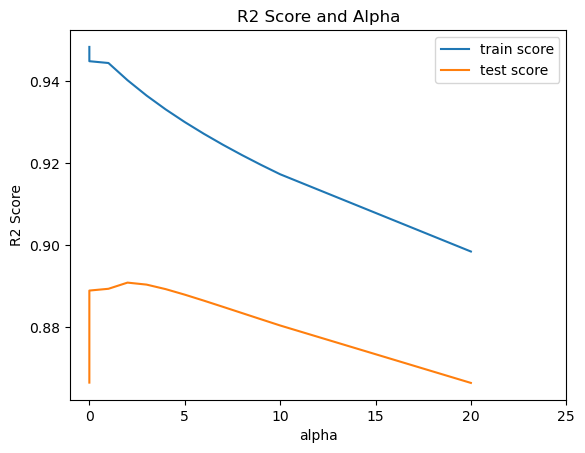

Top 10 variables selected by RFE:
Index(['LotFrontage', 'LotArea', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'TotRmsAbvGrd', 'GarageArea', 'OpenPorchSF',
       'EnclosedPorch'],
      dtype='object')
Coefficients of the top 10 variables:
LotFrontage: [ 2.15980208e-02  4.06991157e-02  4.06315737e-02  9.39210515e-03
 -5.46728535e-03 -9.33639030e-03  6.19229833e-02  6.06788991e-02
  1.73512362e-02  7.77439608e-03  9.10910447e-03  7.96794742e-03
  9.95485074e-04 -3.69847342e-02 -1.79301313e-02  1.30735340e-01
  3.09459318e-02 -8.03224371e-03 -3.19168861e-02 -9.84880279e-03
  2.24492702e-02 -6.08451490e-02 -1.56972507e-03 -1.48389980e-02
  1.36775695e-02  1.92654192e-03  5.24421195e-04  1.55927515e-04
  8.82850159e-03 -5.61965278e-03  3.65875720e-03  1.23962286e-02
 -9.12313102e-03 -4.61837312e-03 -2.86713107e-03  2.54303164e-03
 -1.01756190e-02 -2.86558921e-04 -3.21870078e-03 -3.83004031e-03
  8.00589800e-03  3.03180530e-03 -1.02365946e-03  2.84358306e-02
 -1.5

In [65]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
                    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 
                    20, 50, 100, 500, 1000]}

ridge = Ridge()

# Using RFE to find top 300 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=300)
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

# cross validation
folds = 5
model_cv = GridSearchCV(estimator=ridge, param_grid=params, 
                        scoring='r2', cv=folds, 
                        return_train_score=True, verbose=1)            
model_cv.fit(X_train_rfe, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha'] <= 30]

# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0, 30, 5))
plt.show()

# Print the top 10 variables and their coefficients
top_10_vars = col[:10]
print("Top 10 variables selected by RFE:")
print(top_10_vars)

print('Coefficients of the top 10 variables:')
for var, coef in zip(top_10_vars, ridge_coef[:10]):
    print(f"{var}: {coef}")

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is', alpha)
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train_rfe, y_train)
ridge_coef = ridge_final.coef_
y_test_pred = ridge_final.predict(X_test_rfe)



print('The R2 Score of the model on the test dataset for optimum alpha is', r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

#### Checking with the double alpha value

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Top 10 variables selected by RFE:
Index(['LotFrontage', 'LotArea', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'TotRmsAbvGrd', 'GarageArea', 'OpenPorchSF',
       'EnclosedPorch'],
      dtype='object')
Coefficients of the top 10 variables:
LotFrontage: [ 2.56261364e-02  5.03884448e-02  4.66113011e-02  1.24509938e-02
 -1.03655107e-02 -1.20159381e-02  5.95576683e-02  6.54204052e-02
  1.71727415e-02  1.15648500e-02  1.23225636e-02  1.04253055e-02
  2.11817291e-03 -5.13455953e-02 -1.64776731e-02  1.58537195e-01
  2.88690498e-02 -3.42340407e-03 -2.94941608e-02 -1.60743853e-02
  2.56990698e-02 -7.91886179e-02 -1.03886573e-03 -1.46899144e-02
  1.44019735e-02  1.28977902e-03 -1.22239508e-03  9.54538220e-04
  1.09106262e-02 -5.66616047e-03  4.99816588e-03  1.18211282e-02
 -9.53821597e-03 -6.08399965e-03 -2.83327375e-03  2.68549028e-03
 -1.41263128e-02  2.01682372e-03 -4.52665119e-03 -3.74406838e-03
  9.1416

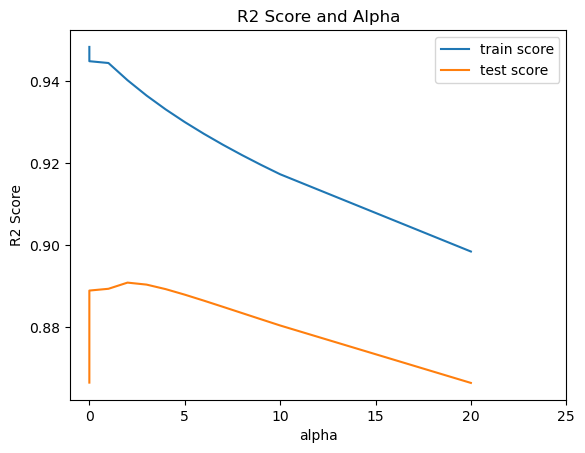

The optimum alpha is 4
The R2 Score of the model on the test dataset for optimum alpha is 0.8600858664757538
The MSE of the model on the test dataset for optimum alpha is 0.0014974745259402533


In [66]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# Using RFE to find top 300 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=300)
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# Print the top 10 variables and their coefficients
top_10_vars = col[:10]
print("Top 10 variables selected by RFE:")
print(top_10_vars)

print('Coefficients of the top 10 variables:')
for var, coef in zip(top_10_vars, ridge_coef[:10]):
    print(f"{var}: {coef}")

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = 4
print('The optimum alpha is',alpha)
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train_rfe,y_train)
ridge_coef = ridge_final.coef_
y_test_pred = ridge_final.predict(X_test_rfe)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

#### Lasso

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Top 10 variables selected by RFE:
Index(['LotFrontage', 'LotArea', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'TotRmsAbvGrd', 'GarageArea', 'OpenPorchSF',
       'EnclosedPorch'],
      dtype='object')
Coefficients of the top 10 variables:
LotFrontage: [ 2.15980208e-02  4.06991157e-02  4.06315737e-02  9.39210515e-03
 -5.46728535e-03 -9.33639030e-03  6.19229833e-02  6.06788991e-02
  1.73512362e-02  7.77439608e-03  9.10910447e-03  7.96794742e-03
  9.95485074e-04 -3.69847342e-02 -1.79301313e-02  1.30735340e-01
  3.09459318e-02 -8.03224371e-03 -3.19168861e-02 -9.84880279e-03
  2.24492702e-02 -6.08451490e-02 -1.56972507e-03 -1.48389980e-02
  1.36775695e-02  1.92654192e-03  5.24421195e-04  1.55927515e-04
  8.82850159e-03 -5.61965278e-03  3.65875720e-03  1.23962286e-02
 -9.12313102e-03 -4.61837312e-03 -2.86713107e-03  2.54303164e-03
 -1.01756190e-02 -2.86558921e-04 -3.21870078e-03 -3.83004031e-03
  8.0058

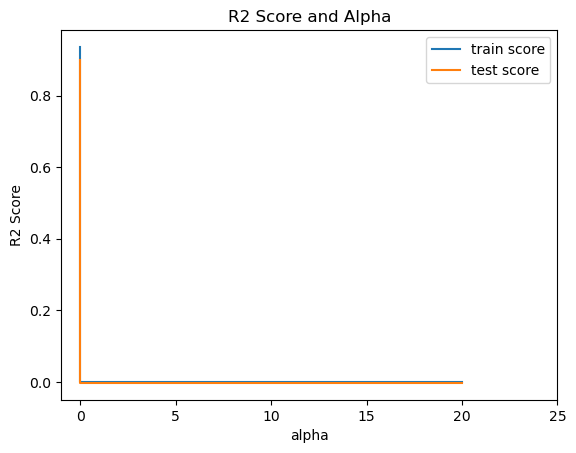

The optimum alpha is 0.002
The R2 Score of the model on the test dataset for optimum alpha is 0.8437253346984515
The MSE of the model on the test dataset for optimum alpha is 0.001672578205248682


In [67]:
# Builsing a Lasso Model with GridSearch CV to find the optimum alpha
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# Using RFE to find top 300 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=300)
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# Print the top 10 variables and their coefficients
top_10_vars = col[:10]
print("Top 10 variables selected by RFE:")
print(top_10_vars)

print('Coefficients of the top 10 variables:')
for var, coef in zip(top_10_vars, ridge_coef[:10]):
    print(f"{var}: {coef}")
    
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = 0.002
print('The optimum alpha is',alpha)
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train_rfe,y_train)
ridge_coef = ridge_final.coef_
y_test_pred = ridge_final.predict(X_test_rfe)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))

In [76]:
# Finding the best 5 variables

best_lasso = model_cv.best_estimator_
lasso_coef = best_lasso.coef_

# Pair the coefficients with their corresponding variable names
coef_dict = dict(zip(col, lasso_coef))

# Sort the variables based on their absolute coefficients
sorted_coef = sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Extract the names of the top 5 variables
top_5_vars = [var for var, coef in sorted_coef[:5]]

print("Top 5 variables based on Lasso coefficients:")
print(top_5_vars)

# Remove the top 5 variables from the dataset
X_train_updated = X_train_rfe.drop(columns=top_5_vars)
X_test_updated = X_test_rfe.drop(columns=top_5_vars)

# Update the Lasso model with the updated dataset
model_cv_updated = GridSearchCV(estimator=lasso, param_grid=params, scoring='r2', cv=folds, return_train_score=True, verbose=1)
model_cv_updated.fit(X_train_updated, y_train)

# Get the coefficients of the best updated Lasso model
best_lasso_updated = model_cv_updated.best_estimator_
lasso_coef_updated = best_lasso_updated.coef_

# Pair the coefficients with their corresponding variable names from updated dataset
updated_coef_dict = dict(zip(X_train_updated.columns, lasso_coef_updated))

# Sort the variables based on their absolute coefficients
sorted_coef_updated = sorted(updated_coef_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Extract the names of the top 5 variables from the updated model
top_5_vars_updated = [var for var, coef in sorted_coef_updated[:5]]

print("Top 5 variables based on updated Lasso coefficients:")
print(top_5_vars_updated)

# Calculate mse and R2 score for the original Lasso model
y_test_pred = best_lasso.predict(X_test_rfe)
mse_original = mean_squared_error(y_test, y_test_pred)
r2_original = r2_score(y_test, y_test_pred)
print(f"MSE for original Lasso model: {mse_original}")
print(f"R2 score for original Lasso model: {r2_original}")

# Calculate mse and R2 score for the updated Lasso model
y_test_pred_updated = best_lasso_updated.predict(X_test_updated)
mse_updated = mean_squared_error(y_test, y_test_pred_updated)
r2_updated = r2_score(y_test, y_test_pred_updated)
print(f"MSE for updated Lasso model: {mse_updated}")
print(f"R2 score for updated Lasso model: {r2_updated}")

Top 5 variables based on Lasso coefficients:
['Total_sqr_footage', 'MSZoning_C (all)', 'GarageArea', 'age', 'TotRmsAbvGrd']
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Top 5 variables based on updated Lasso coefficients:
['LotArea', 'Neighborhood_MeadowV', 'BsmtFinType2_None', 'MSSubClass_30', 'LotFrontage']
MSE for original Lasso model: 0.0015439468939609576
R2 score for original Lasso model: 0.8557437952139043
MSE for updated Lasso model: 0.002188526931863625
R2 score for updated Lasso model: 0.7955184919263238
